# <u>Partie 1.2:</u> Visualisation des données

<b><u>Auteurs</u> :</b> Eytan Levy, Guillaume Surleau et Manitas Bahri  
<b><u>Date</u> :</b> Mars 2023

In [23]:
# Librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Définit le chemin du répertoire parent
import sys
sys.path.append("../")

# Custom packages
from py_scripts import pre_processing as pp
from py_scripts.utils import *


In [24]:
# Pour afficher toutes les collones et lignes de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [25]:
# Charge la base de donnée
DATASET = pp.load_cleaned_dataset()

In [26]:
DATASET["age"].value_counts()

27.000000    1059
23.000000     894
26.000000     869
24.000000     863
25.000000     837
28.000000     746
22.000000     655
29.000000     589
30.000000     574
21.000000     291
32.000000     210
33.000000     161
34.000000     152
31.000000     125
26.358928      95
35.000000      60
20.000000      55
36.000000      45
19.000000      20
42.000000      20
38.000000      19
39.000000      18
18.000000      10
55.000000       6
37.000000       5
Name: age, dtype: int64

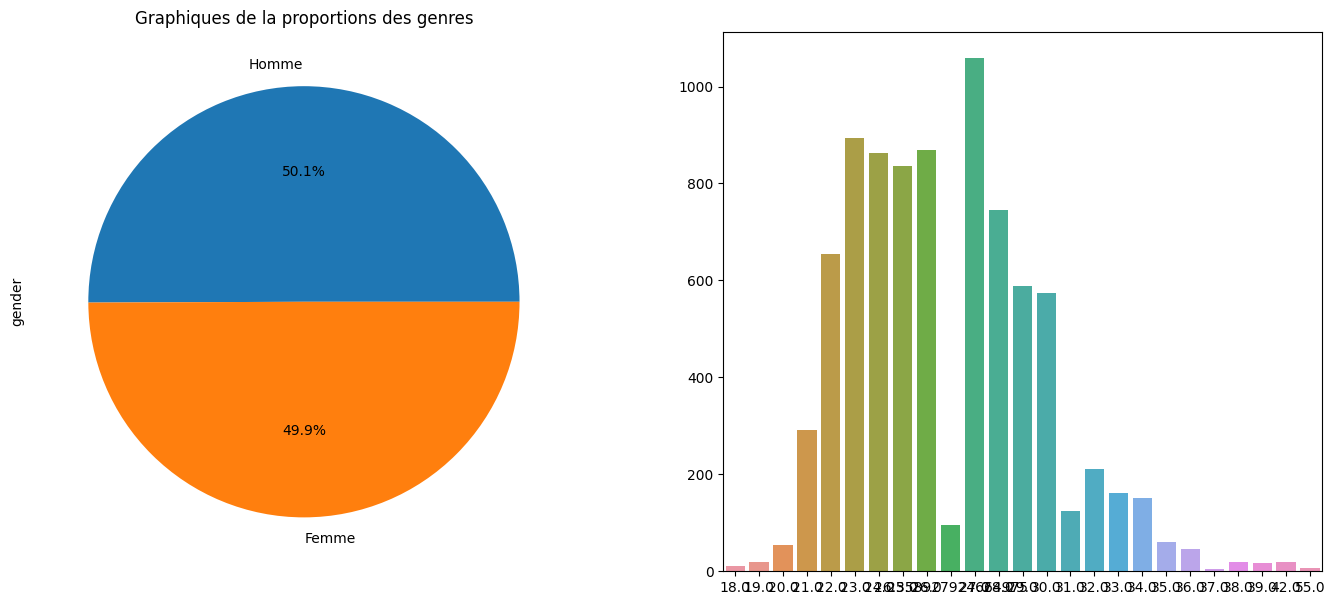

In [39]:
plt.figure(figsize=(17, 7))

args = {"kind": "pie", "autopct": "%.1f%%"}

# Proportion des genres
plt.subplot(121)
plt.title("Graphiques de la proportions des genres")
lbl_gender = ["Homme", "Femme"]
DATASET["gender"].value_counts().plot(**args, labels=lbl_gender)

# Proportion des genres
plt.subplot(122)
data = DATASET["age"].value_counts()
sns.barplot(x=data.keys(), y=data.values)
# plt.xlabel("Proportions")
# plt.ylabel("Domaines des métiers")
# plt.title("Histogrammes des domaines des métiers des personnes.")


plt.show()


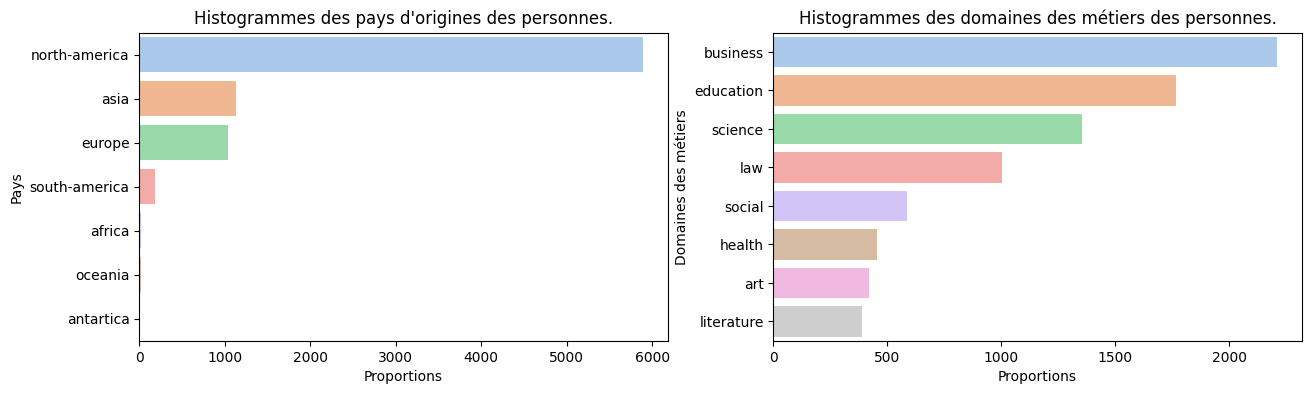

In [ ]:
lbl_from, val_from = count_multiple_columns(DATASET, "from_")
lbl_career, val_career = count_multiple_columns(
    DATASET, "career_", ["career_c"])


plt.figure(figsize=(15, 4))

plt.subplot(121)
sns.barplot(x=lbl_from, y=val_from, palette="pastel")
plt.xlabel("Proportions")
plt.ylabel("Pays")
plt.title("Histogrammes des pays d'origines.")


plt.subplot(122)
sns.barplot(x=lbl_career, y=val_career, palette="pastel")
plt.xlabel("Proportions")
plt.ylabel("Domaines des métiers")
plt.title("Histogrammes des domaines de métiers.")
plt.show()


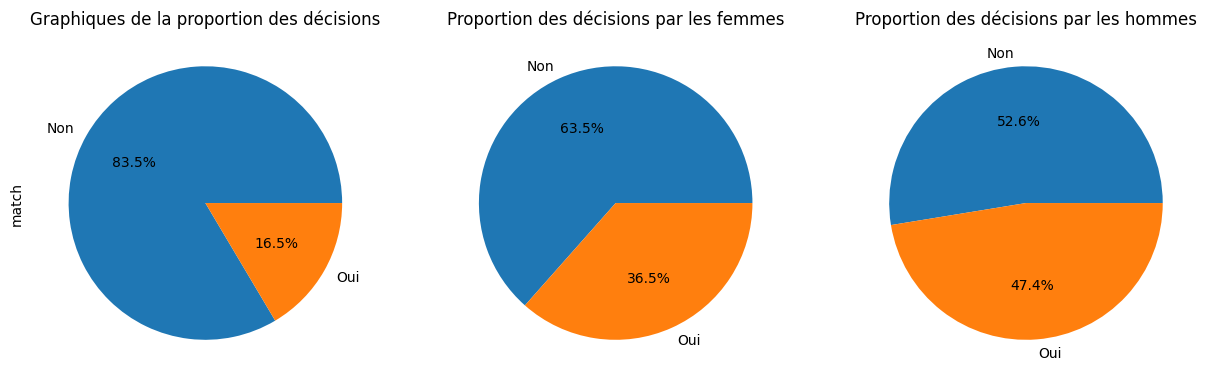

In [ ]:
decision = DATASET.groupby("gender")["decision"].value_counts()
woman_decision, man_decision = decision[0], decision[1]
lbl_yesno = ["Non", "Oui"]

plt.figure(figsize=(15, 7))

# Proportion de match
plt.subplot(131)
plt.title("Graphiques de la proportion des décisions")
DATASET["match"].value_counts().plot(**args, labels=lbl_yesno)

plt.subplot(132)
plt.pie(x=woman_decision, labels=lbl_yesno, autopct="%.1f%%")
plt.title("Proportion des décisions par les femmes")

plt.subplot(133)
plt.pie(x=man_decision, labels=lbl_yesno, autopct="%.1f%%")
plt.title("Proportion des décisions par les hommes")

plt.show()
